In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = dataset.load_data()

In [3]:
clothes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
trainImages.shape

(60000, 28, 28)

In [5]:
len(trainLabels)

60000

In [6]:
trainLabels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
testImages.shape

(10000, 28, 28)

In [8]:
len(testLabels)

10000

In [40]:
plt.figure()
plt.imshow(trainImages[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
#Values were scaled to a range 0 to 1 before feeding the neural network by dividing trainImages by 255
trainImages = trainImages / 255.0

testImages = testImages / 255.0

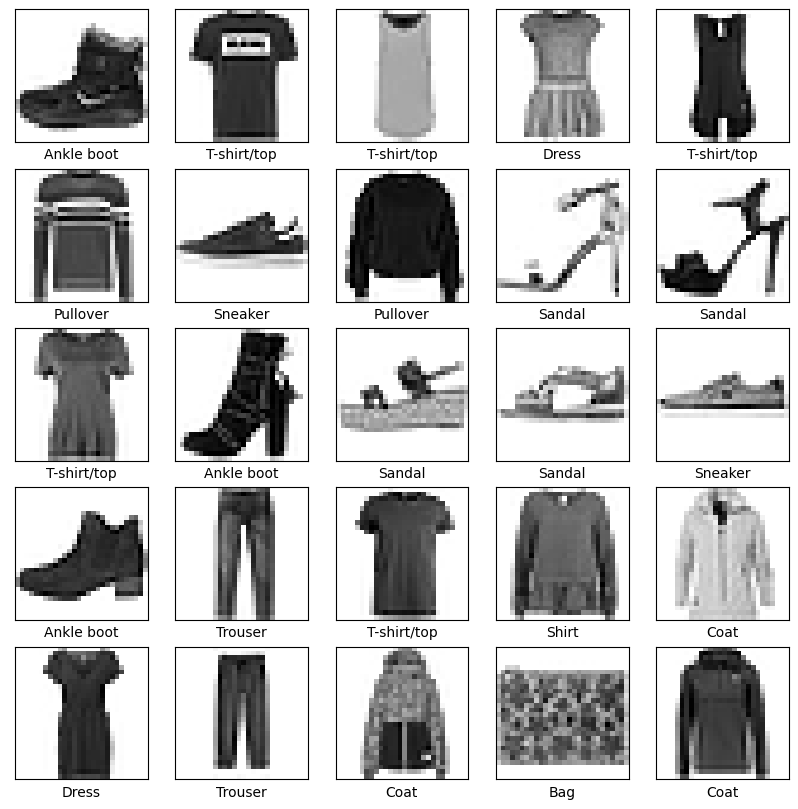

In [16]:
#below is the example of 25 images tested with
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(clothes[trainLabels[i]])
plt.show()

In [17]:
#below are list of layers used to built and train the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
#training the model
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5016 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3342 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3101 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2499 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

In [20]:
#below the model accuracy and loss is evaluate
test_loss, test_acc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3379 - accuracy: 0.8830

Test accuracy: 0.8830000162124634


In [41]:
#another layer added that converts output into probability 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
#calling the model
predictions = probability_model.predict(testImages)

In [23]:
#the first prediction from index 0
predictions[0]

array([2.4500218e-06, 4.0149416e-08, 2.3495410e-08, 1.1803378e-08,
       1.8731212e-06, 1.2178333e-03, 8.9605246e-06, 3.9993662e-02,
       3.1581847e-06, 9.5877200e-01], dtype=float32)

In [24]:
#predict a label with highest confidence value
np.argmax(predictions[0])

9

In [25]:
#checking label predicted
testLabels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clothes[predicted_label],
                                100*np.max(predictions_array),
                                clothes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

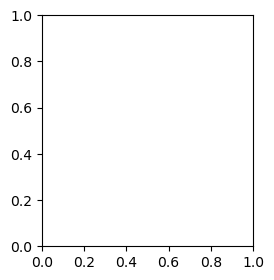

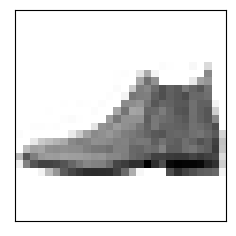

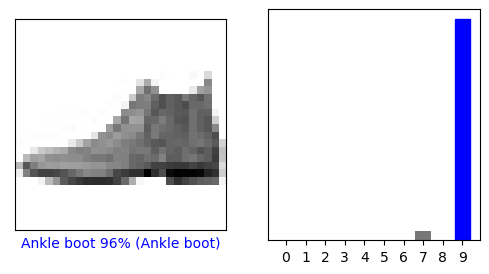

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

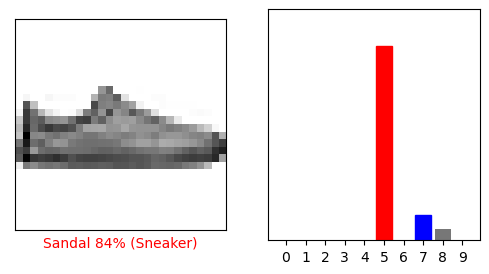

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

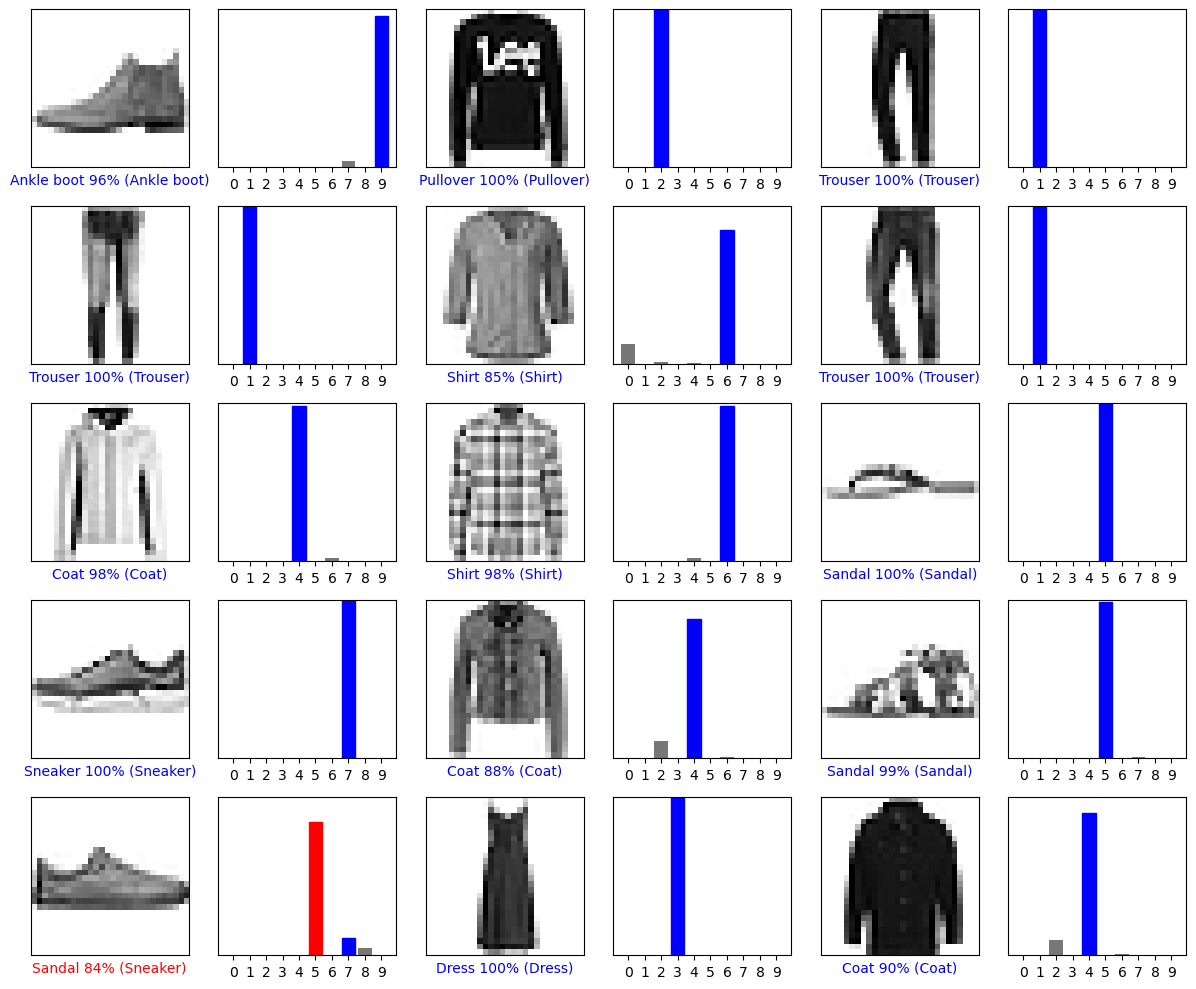

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testLabels, testImages)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testLabels)
plt.tight_layout()
plt.show()

In [34]:
# Grab an image from the test dataset.
img = testImages[1]

print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
#print the first label
print(img.shape)

(1, 28, 28)


In [36]:
#performs predictions
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.6539105e-06 5.8653601e-16 9.9964380e-01 4.2758642e-15 2.4969975e-04
  1.7103072e-15 9.9903460e-05 1.1418076e-15 6.3148958e-11 1.1828323e-19]]


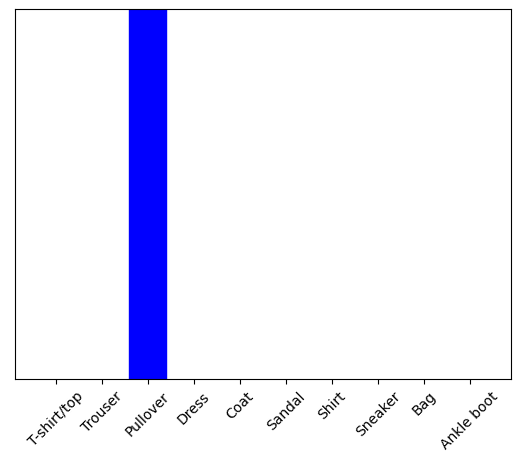

In [37]:
#plotting predicted image
plot_value_array(1, predictions_single[0], testLabels)
_ = plt.xticks(range(10), clothes, rotation=45)
plt.show()

In [38]:
#predict a label with highest confidence value
np.argmax(predictions_single[0])

2